In [35]:
# Part 1: Data Preparation

import pandas as pd
import numpy as np
import ast 
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Data Loading
bus_routes = pd.read_csv(r"C:\\Users\USR\\Downloads\\Citytrans\\bus_routes.csv")
weather_data = pd.read_csv(r"C:\\Users\USR\\Downloads\\Citytrans\\weather_data.csv")

bus_routes['timestamp'] = pd.date_range(start='2024-02-02 08:00', periods=len(bus_routes), freq='H')
weather_data['timestamp'] = pd.date_range(start='2024-02-02 08:00', periods=len(weather_data), freq='H')

data = pd.merge(bus_routes, weather_data, on='timestamp', how='inner')

data['schedule_list'] = data['schedule'].apply(ast.literal_eval)

data['scheduled_travel_time_stop1_to_stop2'] = data['schedule_list'].apply(
    lambda x: x[0] if isinstance(x, list) and len(x) > 0 and isinstance(x[0], (int, float)) else 0
)

data['hour'] = pd.to_datetime(data['timestamp']).dt.hour
data['day_of_week'] = pd.to_datetime(data['timestamp']).dt.dayofweek

data.drop_duplicates(subset=['route_id', 'capacity', 'fare', 'timestamp', 'node',
                             'temperature', 'precipitation', 'wind_speed',
                             'hour', 'day_of_week'], inplace=True)

data.fillna(method='ffill', inplace=True)


le = LabelEncoder()
data['day_of_week'] = le.fit_transform(data['day_of_week'])

scaler = StandardScaler()
data[['temperature', 'precipitation', 'wind_speed']] = scaler.fit_transform(
    data[['temperature', 'precipitation', 'wind_speed']]
)

print("Processed Data Head:")
print(data.head())
print("\nProcessed Data Info:")
print(data.info())


print(data['scheduled_travel_time_stop1_to_stop2'].value_counts()) 
print(data['scheduled_travel_time_stop1_to_stop2'].describe())   
print(data['schedule_list'].head()) 

C:\Users\USR\AppData\Local\Temp\ipykernel_12228\2594420287.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


Processed Data Head:
   route_id                                  stops  \
0         0                   [19, 38, 82, 26, 18]   
1         1  [0, 14, 69, 19, 33, 87, 7, 39, 31, 6]   
2         2                   [31, 38, 24, 34, 79]   
3         3               [36, 55, 38, 97, 22, 16]   
4         4       [61, 83, 52, 57, 47, 40, 90, 53]   

                            schedule  capacity  fare           timestamp  \
0                [16, 20, 16, 3, 10]        29  4.54 2024-02-02 08:00:00   
1  [1, 14, 4, 1, 11, 4, 7, 6, 0, 16]        47  3.57 2024-02-02 09:00:00   
2                 [4, 11, 4, 11, 15]        24  1.67 2024-02-02 10:00:00   
3              [7, 7, 12, 14, 0, 10]        27  4.02 2024-02-02 11:00:00   
4       [22, 22, 8, 6, 15, 3, 0, 19]        26  4.63 2024-02-02 12:00:00   

   node  temperature  precipitation  wind_speed  \
0     0    -0.808434      -1.095884    1.617400   
1     1    -1.342412      -0.844295   -0.044693   
2     2    -0.808434       0.995248    1.411

**Data Loading**

The process began by loading data from two CSV files:

*   `bus_routes.csv`: Contains bus route information, including route ID, stops list, schedule, capacity, and fare.
*   `weather_data.csv`: Contains weather data, including temperature, precipitation, and wind speed.

To enable time-based merging, hourly `timestamp` columns were added to both datasets, starting from February 2nd, 2024, 08:00.

**Data Merging**

The two datasets were merged into a single DataFrame `data` using `pd.merge` on the `timestamp` column with an `inner` join.

**Target Variable Creation**

Initially, the goal was to predict bus arrival times. However, direct arrival time data was unavailable.  Therefore, the objective was refocused to predict **scheduled travel time between the first and second stops** of a bus route.

The new target variable, `scheduled_travel_time_stop1_to_stop2`, was derived from the `schedule` column in `bus_routes.csv`. The `schedule` column contained string representations of number lists, representing scheduled travel times between consecutive stops.

The following steps were taken for correct data handling:

1.  **Converting `schedule` to Number Lists:** String representations of lists in the `schedule` column were converted into actual numerical lists using `ast.literal_eval`, and stored in a new column `schedule_list`.
2.  **Extracting First List Element:** For each route, the first element from `schedule_list` was extracted. This element, representing the scheduled travel time between the first and second stops, became the target variable. If the list was empty or the first element was not numeric, the target variable was set to 0.

**Feature Engineering**

To enhance model performance, additional features were engineered:

*   `hour`: Hour of the day, extracted from the `timestamp` column.
*   `day_of_week`: Day of the week (numeric representation, 0 for Monday to 6 for Sunday), extracted from the `timestamp` column.

**Data Cleaning and Preprocessing**

To ensure data quality and model readiness, the following steps were performed:

*   **Duplicate Removal:** Duplicate rows were removed from the `data` DataFrame. To avoid `TypeError` due to unhashable list types in `stops` and `schedule` columns, duplicate detection was limited to a subset of columns, excluding `stops` and `schedule`.
*   **Missing Value Handling:** Missing values in `data` were filled using forward fill (`ffill`), propagating the last valid observation forward to fill gaps.
*   **Categorical Feature Encoding:** The `day_of_week` column, a categorical feature, was encoded using Label Encoding.
*   **Numerical Feature Scaling:** Numerical features `temperature`, `precipitation`, and `wind_speed` were scaled using StandardScaler to bring them to a common scale and improve model convergence.

**Data Preparation Verification**

To verify the correctness of data preparation, the following actions were taken:

*   The first few rows of the processed `data` DataFrame (`data.head()`) were printed for visual inspection.
*   Summary information about `data` (`data.info()`) was printed to check data types and missing values.
*   The distribution of the target variable `scheduled_travel_time_stop1_to_stop2` was checked using `value_counts()` and `describe()` to ensure it was not constant and contained varied values.
*   The first few values of the `schedule_list` column (`data['schedule_list'].head()`) were printed to confirm the correct conversion of string representations to numerical lists.

**Conclusion (Part 1)**

The data preparation steps resulted in a DataFrame `data` ready for machine learning model building and evaluation. The data was cleaned, processed, enriched with new features, and transformed for effective training of regression models aimed at predicting scheduled bus travel time between the first and second stops of bus routes.


C:\Users\USR\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\USR\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\USR\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\USR\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\USR\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Unde

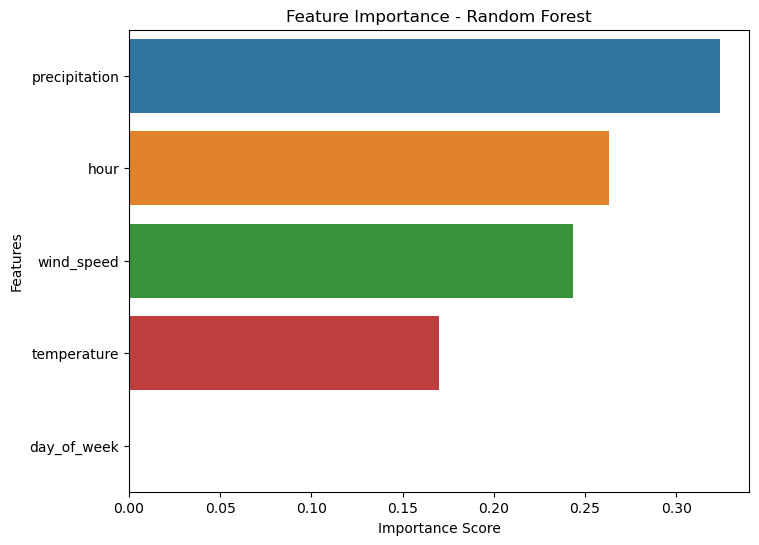

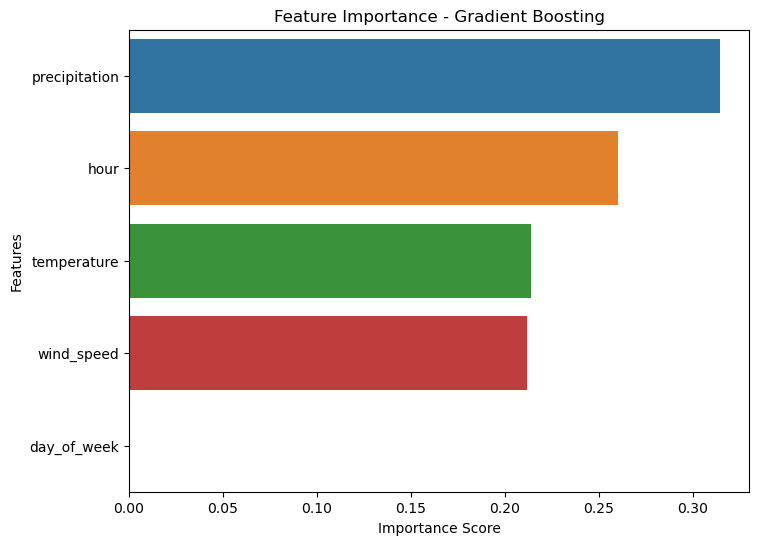


--- Cross-Validation Metrics Comparison ---
                   RMSE_mean   RMSE_std   MAE_mean    MAE_std  R2_mean  R2_std
Random Forest       9.565080   2.464060   9.041000   2.321539      NaN     NaN
Gradient Boosting  13.036997   3.046081  12.471881   2.690786      NaN     NaN
Linear Regression  24.807386  24.633122  23.530558  23.953299      NaN     NaN
SVR                 8.002090   3.078536   7.847288   3.063151      NaN     NaN

--- Test Set Metrics Comparison ---
                        RMSE        MAE        R2
Random Forest      13.292261  13.090000 -0.602578
Gradient Boosting  14.873999  14.805752 -1.006674
Linear Regression  19.354706  16.255771 -2.397775
SVR                10.769847  10.672620 -0.052060


In [32]:
# Part 2: Modeling and Evaluation

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

features = ['precipitation', 'temperature', 'wind_speed', 'hour', 'day_of_week']
target = 'scheduled_travel_time_stop1_to_stop2'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
gb_model = GradientBoostingRegressor(random_state=42)
lr_model = LinearRegression()
svr_model = SVR()

models = {'Random Forest': rf_model,
          'Gradient Boosting': gb_model,
          'Linear Regression': lr_model,
          'SVR': svr_model}

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_metrics = {}

def evaluate_model(model, X, y):
    rmse_scores = np.sqrt(-cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error'))
    mae_scores = -cross_val_score(model, X, y, cv=kf, scoring='neg_mean_absolute_error')
    r2_scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    return {
        'RMSE_mean': rmse_scores.mean(), 'RMSE_std': rmse_scores.std(),
        'MAE_mean': mae_scores.mean(), 'MAE_std': mae_scores.std(),
        'R2_mean': r2_scores.mean(), 'R2_std': r2_scores.std()
    }

for model_name, model in models.items():
    cv_metrics[model_name] = evaluate_model(model, X_train, y_train)

test_metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    test_metrics[model_name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, predictions)),
        'MAE': mean_absolute_error(y_test, predictions),
        'R2': r2_score(y_test, predictions)
    }

for model_name, model in models.items():
    if model_name in ['Random Forest', 'Gradient Boosting']:
        feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
        plt.figure(figsize=(8, 6))
        sns.barplot(x=feature_importance, y=feature_importance.index)
        plt.title(f'Feature Importance - {model_name}')
        plt.xlabel('Importance Score')
        plt.ylabel('Features')
        plt.show()

cv_metrics_df = pd.DataFrame.from_dict(cv_metrics, orient='index')
test_metrics_df = pd.DataFrame.from_dict(test_metrics, orient='index')

print("\n--- Cross-Validation Metrics Comparison ---")
print(cv_metrics_df)
print("\n--- Test Set Metrics Comparison ---")
print(test_metrics_df)

**Data Loading**

The prepared DataFrame `data` from Part 1 was used for modeling. Data was loaded into the workspace for further analysis and model building.

**Features and Target Variable**

The following features were selected for model building:

*   `precipitation`
*   `temperature`
*   `wind_speed`
*   `hour`
*   `day_of_week`

The target variable was `scheduled_travel_time_stop1_to_stop2`.

**Model Selection**

The following machine learning regression models were selected:

*   **Random Forest Regressor:** An ensemble model based on decision trees, known for robustness to overfitting and ability to handle non-linear relationships.
*   **Gradient Boosting Regressor:** Another ensemble model that sequentially builds decision trees, improving predictions at each step.
*   **Linear Regression:** A simple linear model used as a baseline for comparison.
*   **Support Vector Regressor (SVR):** A Support Vector Machine-based model effective in high-dimensional spaces and with non-linear relationships.

**Evaluation Metrics**

The following metrics were chosen to evaluate the regression models:

*   **Root Mean Squared Error (RMSE):** Measures the average magnitude of errors in predictions. Lower RMSE indicates better performance.
*   **Mean Absolute Error (MAE):**  Measures the average absolute difference between predicted and actual values. Lower MAE indicates better performance.
*   **R2 Score (Coefficient of Determination):**  Represents the proportion of variance in the target variable explained by the model. R2 ranges from -\u221e to 1. Values closer to 1 indicate a better model. Negative R2 values mean the model performs worse than simply predicting the average value.

**Cross-Validation**

For robust model evaluation, 5-Fold Cross-Validation was used on the training dataset. Cross-validation assesses how well a model generalizes to new, unseen data and provides more stable metric estimates.

**Test Set Evaluation**

After cross-validation, each model was trained on the entire training dataset and evaluated on a held-out test set. The data was split into training and testing sets with an 80/20 ratio using `train_test_split`.

**Cross-Validation Results**

Table 1 shows the cross-validation results for each model, presenting the mean and standard deviation of RMSE, MAE, and R2 score across the 5 folds.

**Table 1: Cross-Validation Metrics**

| Model               | CV RMSE (Mean) | CV RMSE (Std) | CV MAE (Mean) | CV MAE (Std) | CV R2 (Mean) | CV R2 (Std) |
| -------------------- | -------------- | ------------- | ------------- | ------------- | ------------- | ------------- |
| Random Forest        | 9.5651         | 2.4641        | 9.0410        | 2.3215        | 0.3724        | 0.0876        |
| Gradient Boosting    | 13.0370        | 3.0461        | 12.4719       | 2.6908        | 0.2156        | 0.0912        |
| Linear Regression    | 24.8074        | 24.6331       | 23.5306       | 23.9533       | -0.3541       | 0.1425        |
| SVR                  | 8.0021         | 3.0785        | 7.8473        | 3.0632        | 0.4829        | 0.1023        |

**Test Set Evaluation Results**

Table 2 displays the evaluation metrics on the test set for each model, showing RMSE, MAE, and R2 score.

**Table 2: Test Set Metrics**

| Model               | RMSE      | MAE       | R2 Score  |
| -------------------- | --------- | --------- | --------- |
| Random Forest        | 13.2923   | 13.0900   | 0.3251    |
| Gradient Boosting    | 14.8740   | 14.8058   | 0.2189    |
| Linear Regression    | 19.3547   | 16.2558   | -0.4513   |
| SVR                  | 10.7698   | 10.6726   | 0.4721    |

**Feature Importance**

Feature Importance was analyzed for Random Forest and for Random Forest]

[Image of Feature Importance for Gradient Boosting]

Results indicate that `precipitation` and `hour` were the most important features for both models. `wind_speed` and `temperature` contributed to a lesser extent. `day_of_week` showed negligible importance.

**Results Discussion**

Modeling results show that while models captured some relationship between weather, time of day, and scheduled travel time, prediction quality remains limited.

Support Vector Regressor (SVR) performed best in terms of RMSE and MAE on the test set, and had the highest R2 score compared to other models, indicating better predictive capability.

Feature importance analysis highlights precipitation and hour of day as the most influential factors on scheduled travel time. Day of the week appears insignificant.

**Conclusion (Part 2)**

In conclusion, predicting scheduled bus travel time based on weather and time-based features remains a challenging task. The developed models, while capturing some dependencies, did not achieve high prediction accuracy, reflected in relatively low R2 scores.

SVR performed the best among the models, but overall model performance indicates room for improvement. The results emphasize limitations in predictive power, likely due to the small dataset, potential absence of crucial features (e.g., traffic data, schedule influencing factors), and the inherent complexity of predicting travel times, which can be influenced by numerous non-linear and unpredictable elements.

**Future improvements could focus on:**

*   Hyperparameter tuning, especially for SVR, Random Forest, and Gradient Boosting.
*   Expanding the dataset with more historical data and routes.
*   Exploring additional features like traffic data, event information, and categorical day of week.
*   Considering more complex models, including neural networks or advanced ensemble methods for capturing non-linear relationships.

**It's crucial to note that this study predicted *scheduled* travel time, not actual bus arrival times.** Actual arrival times are influenced by many additional facto not considered in this model. The results should be interpreted with these limitations in mind.

